#### State Space Modeling
The model that we consider is the following 
\begin{equation}
\dot{\underline{x}}_{1-6} = \mathbf{\underline{A}} \underline{x}_{1-6} + \mathbf{\underline{B}} u + \mathbf{\underline{F}} z
\end{equation}

where $\mathbf{\underline{A}}$ is the system matrix, $\mathbf{\underline{B}}$ is the control matrix and $\mathbf{\underline{F}}$ is the disturbance matrix. Also, $\underline{x}$ is the state vector, $\underline{u}$ is the control vector, $\underline{z}$ is the disturbance vector. To make the state states are decoupled, the matrices $\mathbf{\underline{A}}$ and $\mathbf{\underline{B}}$ should be diagonal matrices. There are many approaches to make it decouple, one of the approaches is using the transformation matrix $\mathbf{\underline{T}}$.

\begin{equation}
\dot{\underline{x}}_{7-12} = \underline{u} \odot \underline{x}_{1-6}
\end{equation}

\begin{equation}
\underline{y} = \mathbf{\underline{C}} \underline{x}_{1-6}
\end{equation}


After we apply this transformation, the system becomes

\begin{equation}
\dot{\tilde{\underline{x}}}_{1-6} = \tilde{\mathbf{\underline{A}}} \tilde{\underline{x}}_{1-6} + \tilde{\mathbf{\underline{B}}} \tilde{u} + \tilde{\mathbf{\underline{F}}} \tilde{z} 
\end{equation}

\begin{equation}
\dot{\underline{x}}_{7-12} = \mathbf{T}^\top \underline{\tilde{u}} \odot \mathbf{T}^\top \tilde{\underline{x}}_{1-6}
\end{equation}

\begin{equation}
\tilde{\underline{y}} = \tilde{\mathbf{\underline{C}}} \tilde{\underline{x}}_{1-6}
\end{equation}

After we get the transformed values for $\tilde{\underline{y}}$, by using the following relation we get the untransformed values for $\underline{y}$, as desired.

\begin{equation}
\tilde{\underline{y}} = \mathbf{T}\mathbf{C}^\top\underline{y}
\end{equation}


\begin{equation}
\begin{array}{cc} 
\underline{y}
\end{array}
= \left(\begin{array}{c} 
-\tilde{x_{5}}-\frac{1}{\sqrt{3}} \tilde{x_{6}}\\
\tilde{x_{5}}-\frac{1}{\sqrt{3}} \tilde{x_{6}}\\ 
\frac{2}{\sqrt{3}} \tilde{x_{6}}\\
\end{array}\right)  
\end{equation}


To find the initial conditions for $x_{1:6}$, we are using the function of $y_{ref}$ at time $t=0$. Then we have the following linear system 

\begin{equation}
\left(\begin{array}{cc} 
y_{1,ref}(0) \\
y_{2,ref}(0) \\
y_{3,ref}(0) \\
\end{array}\right)
= \left(\begin{array}{c} 
0 & 0 & 0 & 0 & -1 & \frac{1}{\sqrt{3}}\\
0 & 0 & 0 & 0 & -1 &  \frac{-1}{\sqrt{3}}\\ 
0 & 0 & 0 & 0 & 0 & \frac{2}{\sqrt{3}} \\
\end{array}\right)     
\left(\begin{array}{c} 
\\
\tilde{x_{5}}(0)\\ 
\\
\end{array}\right) 
\end{equation}

where $$y_{\text{k, ref}} = \hat{I}_{\text{AC}} \cdot \cos\left( \omega_{\text{AC}} t - \frac{2 \pi (k - 1)}{3} - \varphi_{\text{AC}} \right)$$
with $k={1,2,3}$, $\hat{I}_{\text{AC}} = 15$, $\varphi_{\text{AC}}=0$ and $ \omega_{\text{AC}} = 2\pi50$

In [2]:
def y_reference(t,I_AC,omega_AC):
    y = []
    for k in range(3):
        y.append(I_AC*np.cos(omega_AC*t-2*np.pi*(k-1)/3))
    return np.array(y)

#Define inital values for x_tilde
A = np.array([[0,0,0,0,-1,-1/np.sqrt(3)],
             [0,0,0,0,1,-1/np.sqrt(3)],
             [0,0,0,0,0,2/np.sqrt(3)]])

b_ = y_reference(0,I_AC,omega)
# Use least squares to solve Ax = b
x_tilde0, residuals, rank, singular_values = np.linalg.lstsq(A, b_, rcond=None)

print(r"Least squares solution for $\widetilde{x}_0$:", x_tilde0)

Least squares solution for $\widetilde{x}_0$: [-8.88178420e-16  1.77635684e-15  0.00000000e+00  0.00000000e+00
  1.12500000e+01 -6.49519053e+00]


In [4]:
import numpy as np
[t for t in np.arange(0, 0 + 125e-6, 125e-6)]

[0.0]

In [ ]:
import umbridge
import numpy as np

# Initialize the model
model = umbridge.HTTPModel("http://localhost:4242", "forward")

R_arm = [ 20e-3 ]     # Example value for R_arm
R_DC = [10e-3]      # Example value for R_DC
R_AC = [60e-3 ]      # Example value for R_AC
L_arm = [200e-6]     # Example value for L_arm
L_DC = [5e-3]      # Example value for L_DC
L_AC = [320e-3]      # Example value for L_AC

p_initial = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
x_initial = x_tilde0 #[ -8.88178420e-16, 1.77635684e-15,  0.00000000e+00,  0.00000000e+00, 1.12500000e+01, -6.49519053e+00]
omega_AC = [2*np.pi*50]                  
resolution = 125e-6
t_span = [0,0.02]   
t_eval = np.arange(t_span[0],t_span[-1]+resolution,resolution)

 

# Create the parameters list
parameters = [R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p_initial, x_initial, omega_AC, t_eval]

#Call the model
x_tilde_sol = model(parameters)
x_tilde_sol = np.array(x_tilde_sol)
y_1 = np.array(-x_tilde_sol[4]-1/np.sqrt(3)*x_tilde_sol[5])
y_2 = np.array(x_tilde_sol[4]-1/np.sqrt(3)*x_tilde_sol[5])
y_3 = np.array(2/np.sqrt(3)*x_tilde_sol[5])
y_out = np.array([y_1, y_2, y_3])

#### Optimisation Procedure

In [ ]:
# Do optimisation procedure
# Define reference vector
y_ref = np.array([y_reference(t,I_AC=I_AC,omega_AC=omega_AC) for t in t_eval])

def objective_function(R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p, x_initial, omega, t_eval, y_ref):
    """
    Calculate the MSE between the actual output of the MMC and the desired y_ref
    """
    #model = umbridge.HTTPModel("http://localhost:4242", "forward")
    parameters = [R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p, x_initial, omega, t_eval]
    x_tilde_sol = model(parameters)
    x_tilde_sol = np.array(x_tilde_sol)
    y_1 = np.array(-x_tilde_sol[4]-1/np.sqrt(3)*x_tilde_sol[5])
    y_2 = np.array(x_tilde_sol[4]-1/np.sqrt(3)*x_tilde_sol[5])
    y_3 = np.array(2/np.sqrt(3)*x_tilde_sol[5])
    y_out = np.array([y_1, y_2, y_3])
    
    mse = np.mean((y_out.T-y_ref)**2)
    return mse

In [3]:
#Implement constraints 
def control_vector(t, p):
    u1 = p[0] + p[1] * np.sin(2 * np.pi * (50 * t + p[2])) + p[3] * np.cos(2 * np.pi * (50 * t + p[4]))
    u2 = p[5] + p[6] * np.sin(2 * np.pi * (50 * t + p[7])) + p[8] * np.cos(2 * np.pi * (50 * t + p[9]))
    u3 = p[10] + p[11] * np.sin(2 * np.pi * (50 * t + p[12])) + p[13] * np.cos(2 * np.pi * (50 * t + p[14]))
    u4 = p[15] + p[16] * np.sin(2 * np.pi * (50 * t + p[17])) + p[18] * np.cos(2 * np.pi * (50 * t + p[19]))
    u5 = p[20] + p[21] * np.sin(2 * np.pi * (50 * t + p[22])) + p[23] * np.cos(2 * np.pi * (50 * t + p[24]))
    u6 = p[25] + p[26] * np.sin(2 * np.pi * (50 * t + p[27])) + p[28] * np.cos(2 * np.pi * (50 * t + p[29]))

    return np.array([u1, u2, u3, u4, u5, u6])

# T matrix 
T = np.array( [[1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6)],
                      [-1/np.sqrt(6), -1/np.sqrt(6), -1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6)],
                      [1/2, -1/2, 0, -1/2, 1/2, 0],
                      [1/np.sqrt(12), 1/np.sqrt(12), -1/np.sqrt(3), -1/np.sqrt(12), -1/np.sqrt(12), 1/np.sqrt(3)],
                      [-1/2, 1/2, 0, -1/2, 1/2, 0],
                      [-1/np.sqrt(12), -1/np.sqrt(12), 1/np.sqrt(3), -1/np.sqrt(12), -1/np.sqrt(12), 1/np.sqrt(3)],
                     ])

def arm_powers(x_tilde,T,p,t_eval):
    """
    Calculate the arm powers for the numerically determined x_tilde_1..x_tilde_6 at the same t_eval points
    """
    u_t = np.array([control_vector(t,p) for t in t_eval])
    x_tilde_power = np.multiply(T.T @ (T @ u_t.T), T.T @ x_tilde) 
    return x_tilde_power


def constraint_arm_power(upper_bound, R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p, x_initial, omega, t_eval):
    """
    Define constraint on arm powers, i.e. derivatives of x_7...x_12. That is, they must not exceed 5 kW
    """
    #model = umbridge.HTTPModel("http://localhost:4242", "forward")
    parameters = [R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p, x_initial, omega, t_eval]
    x_tilde_sol = model(parameters)
    x_tilde_sol = np.array(x_tilde_sol)

    #Calculate arm powers
    x_tilde_power = arm_powers(x_tilde_sol,T,p,t_eval)

    #Enforce that x_tilde_power is within the specified bounds
    ineq = upper_bound-np.abs(x_tilde_power)

    return ineq.flatten()

def constraint_control_vector(p,t_eval,bound):
    u = np.array([control_vector(t,p) for t in t_eval])
    
    ineq = bound - np.abs(u)
    return ineq.flatten()

#Define upper bounds for constraints
arm_powers_upper_bound = 5e3 #in W
control_vector_bound = 800 #in V

#Define constraints
constraints = [{"type": "ineq","fun": constraint_control_vector, "args":(t_eval,control_vector_bound)},
               {"type": "ineq","fun": constraint_arm_power,"args":(x_tilde0,A,B,F,omega,U_AC,U_DC,arm_powers_upper_bound,t_span,t_eval)}]


# Perform optimization to minimize the objective function
p_result = minimize(objective_function, x0=p_initial, args=(R_arm,x_tilde0, A, B, F, T, omega,t_eval, y_ref),constraints=constraints,method='SLSQP')

def objective_function(R_arm, R_DC, R_AC, L_arm, L_DC, L_AC, p, x_initial, omega, t_eval, y_ref):


### Plot output y of MMC

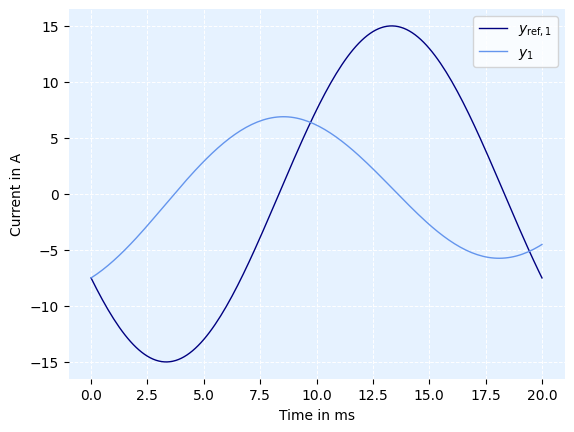

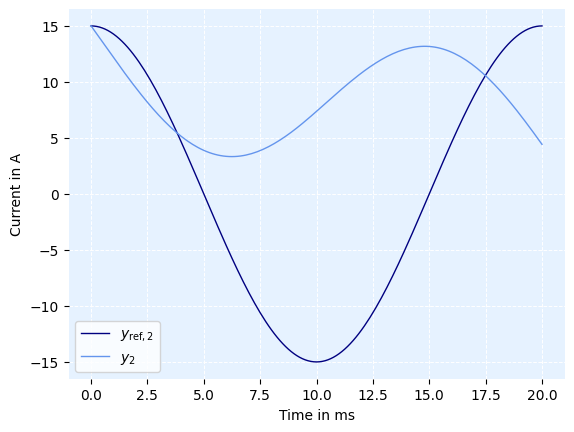

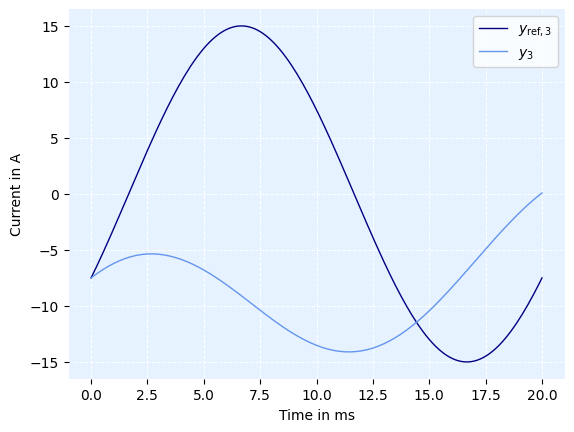

In [4]:
#save optimised parameters
p_optimised = p_result.x
#print(p_optimised)

#Compare y calculated with control vector with optimised parameters to y_ref
y_sol_optimised_p = y_sol(p=p_optimised,x0=x_tilde0,A_tilde=A,B_tilde=B,F_tilde=F,T=T,omega_AC=omega,U_AC=U_AC,U_DC=U_DC)
#print(y_sol_optimised_p)

#Plot solution
for i in range(3):
    fig,ax = plt.subplots()
    ax.plot(t_eval*1e3,[y_reference(t,I_AC=I_AC,omega_AC=omega)[i] for t in t_eval],color="navy",linewidth=1,label=r"$y_{{\text{{ref}},{}}}$".format(i+1))
    #ax.scatter(t_eval,[y_reference(t,I_AC=I_AC,omega_AC=omega)[i] for t in t_eval],edgecolor="navy",s=5)
    ax.plot(t_eval*1e3,y_sol_optimised_p[i],color="cornflowerblue",linewidth=1,label=r"$y_{}$".format(i+1))
    #ax.scatter(t_eval,y_sol_optimised_p[i],edgecolor="cornflowerblue",s=5)

    ax.legend()

    # Customize x-axis ticks to use scientific notation with 10^
    ticks = ax.get_xticks()  # Get current x ticks

    #ax.ticklabel_format(axis="x",style="sci",scilimits=(0,0))

    # Optionally add axis labels and a title
    ax.set_xlabel('Time in ms')  # Replace with your actual x-axis label
    ax.set_ylabel('Current in A')  # Replace with your actual y-axis label

    ax.set_facecolor('#e6f2ff') 
    ax.grid(True, color='white', linestyle='--', linewidth=0.7)  # Lighter grid lines
    # Remove the outer boxes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.show()
    plt.close()

### Plot Control Vector $\underbar{u}(t)$ for optimised parameters

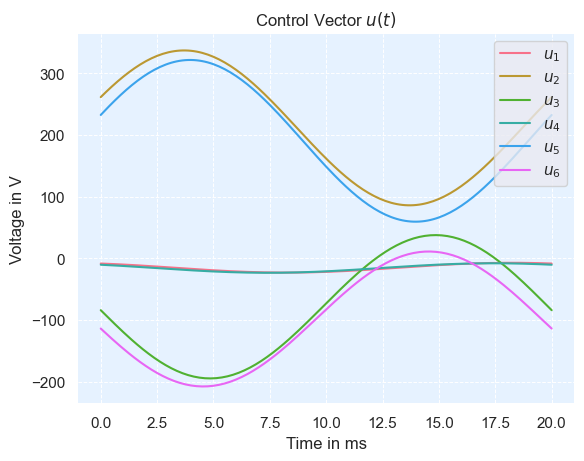

In [5]:
import seaborn as sns
sns.set_theme() 
# Define a color palette
colors = sns.color_palette("husl", 6) 

fig, ax = plt.subplots()  # Corrected this line to ensure ax is defined correctly
for i in range(6):
    # Using a list comprehension to get control vector values for plotting
    ax.plot(t_eval*1e3, [control_vector(t, p_optimised)[i] for t in t_eval], color=colors[i],label=r"$u_{}$".format(i+1))

ax.legend()

ticks = ax.get_xticks()  # Get current x ticks

#ax.ticklabel_format(axis="x",style="sci",scilimits=(0,0))

# Optionally add axis labels and a title
ax.set_xlabel('Time in ms')  # Replace with your actual x-axis label
ax.set_ylabel('Voltage in V')  # Replace with your actual y-axis label
ax.set_title(r'Control Vector $u(t)$')  # Replace with your actual title

ax.set_facecolor('#e6f2ff') 
ax.grid(True, color='white', linestyle='--', linewidth=0.7)  # Lighter grid lines
# Remove the outer boxes (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()
plt.close()

### Plot arm powers $\dot{x}_{7-12}$

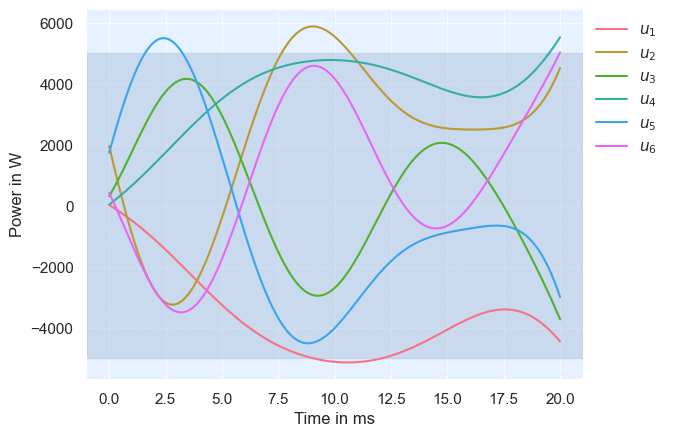

In [6]:
sol = solve_ivp(MMC_ODE,t_span=t_span,y0=x_tilde0,method="RK45",t_eval=t_eval,args=(p_optimised,A,B,F,T,omega,U_AC,U_DC))
x_tilde_sol = sol.y
mmc_arm_powers = arm_powers(x_tilde_sol,T,p_optimised,t_eval)

#Plot the arm powers
fig, ax = plt.subplots()  # Corrected this line to ensure ax is defined correctly
for i in range(6):
    # Using a list comprehension to get control vector values for plotting
    ax.plot(t_eval*1e3, mmc_arm_powers[i], color=colors[i],label=r"$u_{}$".format(i+1))

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Color a specific area in the background
ax.axhspan(-5e3, 5e3, color='lightsteelblue', alpha=0.5)

# Optionally add axis labels and a title
ax.set_xlabel('Time in ms')  # Replace with your actual x-axis label
ax.set_ylabel('Power in W')  # Replace with your actual y-axis label

ax.set_facecolor('#e6f2ff') 
ax.grid(True, color='white', linestyle='--', linewidth=0.7)  # Lighter grid lines
# Remove the outer boxes (spines)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()
plt.close()